In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0394.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0105.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0104.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0325.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0296.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0329.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0100.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0299.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0301.JPG
/kaggle/inpu

Transfer Learning: The process where we use a pretrained model which is generally trained on a very large dataset and which has been used with a specific classifier on top of it so that it can learn and classify based on the already existing feature maps of the pretrained model previously trained.

Generaly workflow for Transfer Learning:

1.Base Model with Pre-trained Weights: Initially, you start with a pre-trained deep learning model, such as VGG, ResNet, or Inception, that has been trained on a large dataset like ImageNet for a general task like image classification. The model has learned to extract useful features from images, which are stored in its layers.

2.Freezing Layers: To perform transfer learning, you typically freeze most of the layers in the pre-trained model. Freezing means that you prevent their weights from being updated during training. This is done because you want to retain the valuable feature representations learned during the pre-training phase, ensuring that you don't lose them when training on your specific dataset.

3.Adding New Classifier Layers: On top of the frozen base model, you add new layers, often referred to as the classifier layers. These new layers are randomly initialized and are usually shallow compared to the pre-trained base model. These layers will be trained from scratch to adapt the model to your specific task.

4.Unfreezing Top Layers for Fine-Tuning: Fine-tuning involves unfreezing a few of the top layers of the pre-trained base model. By doing this, you allow these layers to be updated during training, along with the newly added classifier layers. The purpose of fine-tuning is to adjust the higher-order feature representations in the base model to better suit the characteristics of your specific dataset or task.

5.Joint Training: With the top layers unfrozen, you then perform joint training on the entire model. During this phase, the gradients from both the new classifier layers and the unfrozen layers of the base model are used to update the model's weights. This allows the model to learn task-specific features while also adjusting the previously learned representations in the base model to better align with the new task.

In [90]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.10/site-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [91]:
#Install required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [92]:
IMAGE_SIZE = 224 #Although our input images are 256 *256 we rescale them to 224*224 so we can use mobilenetv2
BATCH_SIZE = 16

In [93]:
#lets load the tf dataset using api. This function loads images from our specified directory and convert images to tensors
#having rgb values of each image and extracts the label for it.
dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/rice-leaf-diseases/rice_leaf_diseases",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,   
)

Found 120 files belonging to 3 classes.


In [94]:
import os
import random
import shutil

# Define the main directory
main_directory = "/kaggle/input/rice-leaf-diseases/rice_leaf_diseases"

# Define the directory to move the selected images
test_directory = "/kaggle/working/test"

# Get the list of subdirectories
subdirectories = [subdir for subdir in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, subdir))]

# Iterate through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(main_directory, subdir)
    # Get the list of image files in the subdirectory
    image_files = [file for file in os.listdir(subdir_path) if file.endswith(".JPG") or file.endswith(".jpg") or file.endswith(".png")] # Adjust extensions as needed

    # Calculate the number of images to move (1/4th of available images)
    num_images_to_move = max(1, len(image_files) // 4)

    # Randomly select images
    selected_images = random.sample(image_files, num_images_to_move)

    # Move selected images to the test directory
    for image in selected_images:
        src = os.path.join(subdir_path, image)
        dst = os.path.join(test_directory, subdir, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)
        print(f"Copied {image} to {dst}")

Copied DSC_0105.jpg to /kaggle/working/test/Brown spot/DSC_0105.jpg
Copied DSC_0119.jpg to /kaggle/working/test/Brown spot/DSC_0119.jpg
Copied DSC_0302.JPG to /kaggle/working/test/Brown spot/DSC_0302.JPG
Copied DSC_0394.jpg to /kaggle/working/test/Brown spot/DSC_0394.jpg
Copied DSC_0114.jpg to /kaggle/working/test/Brown spot/DSC_0114.jpg
Copied DSC_0306.JPG to /kaggle/working/test/Brown spot/DSC_0306.JPG
Copied DSC_0107.jpg to /kaggle/working/test/Brown spot/DSC_0107.jpg
Copied DSC_0117.jpg to /kaggle/working/test/Brown spot/DSC_0117.jpg
Copied DSC_0325.JPG to /kaggle/working/test/Brown spot/DSC_0325.JPG
Copied DSC_0100.jpg to /kaggle/working/test/Brown spot/DSC_0100.jpg
Copied DSC_0403.JPG to /kaggle/working/test/Bacterial leaf blight/DSC_0403.JPG
Copied DSC_0702.jpg to /kaggle/working/test/Bacterial leaf blight/DSC_0702.jpg
Copied DSC_0398.JPG to /kaggle/working/test/Bacterial leaf blight/DSC_0398.JPG
Copied DSC_0397.JPG to /kaggle/working/test/Bacterial leaf blight/DSC_0397.JPG
Copi

In [95]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [96]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [97]:
# plt.figure(figsize = (20,20)) # Lets increse plot size of our plots
# #Lets explore our batch and display some images
# for image_batch,label_batch in dataset.take(1):
#     for i in range(12):
#     #To visualize all images plot as subplot 
#         ax = plt.subplot(3,4,i+1)
#     #Visualize image using matplotlib imshow function plt.imshow expects a 3D numpy array
#         plt.title(class_names[label_batch[i]]) # Displaying its class label as title
#         plt.imshow(image_batch[i].numpy().astype('uint8'))
#     print(image_batch.shape)
#     print(label_batch.numpy())

In [98]:
y = np.concatenate([y for x, y in dataset], axis=0)
print(np.bincount(y))#np.bincount(array) counts occurence of each element in array.

[40 40 40]


In [99]:
def get_partition(ds,train_split = 0.7, validate = 0.2,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    train_size = int(train_split*ds_size)
    val_size = int(validate*ds_size)
    train = ds.take(train_size)
    val = ds.skip(train_size).take(val_size)
    test = ds.skip(train_size).skip(val_size)
    return train,val,test

In [100]:
train,val,test = get_partition(dataset)

In [101]:
len(train)

5

In [102]:
#It will read the image from the disk and for next iteration if you need the same image it will keep that image in memory

#Prefetching used to reduce disk I/O Blocking and load images into the model faster
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [103]:
#This code is used when we have small datasets.
#To flip the images given into the model we use this code so that the model can view the images in different orientations and can get trained on that.

data_augment = tf.keras.Sequential(
[
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)   
])  

In [104]:
train = train.map(
    lambda x, y: (data_augment(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [105]:
#We are preprocessing the input here so that the pixel values of the image can be rescaled to a range [-1,1] from (0,255)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [106]:
#Here we are downloading the base model which has been trained on the ImageNet Dataset (very large) and specifying to not include the top layers so that we can choose the
#bottleneck layers which are because they retain more generality than the top layers
IMG_SHAPE =  (224,224)+ (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [107]:
#converts image batch into 7x7x1280 block of features.
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 7, 7, 1280)


In [108]:
#Here we are freezing all the layers from the base model so that the weights do not get updated.
base_model.trainable = False

In [109]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [110]:
#to generate predictions from the block of features we convert the features into a single 1280 element vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


In [111]:
#Convert all features into single prediction per image.
prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

In [112]:
#Build a model together with all the preprocessing done before
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

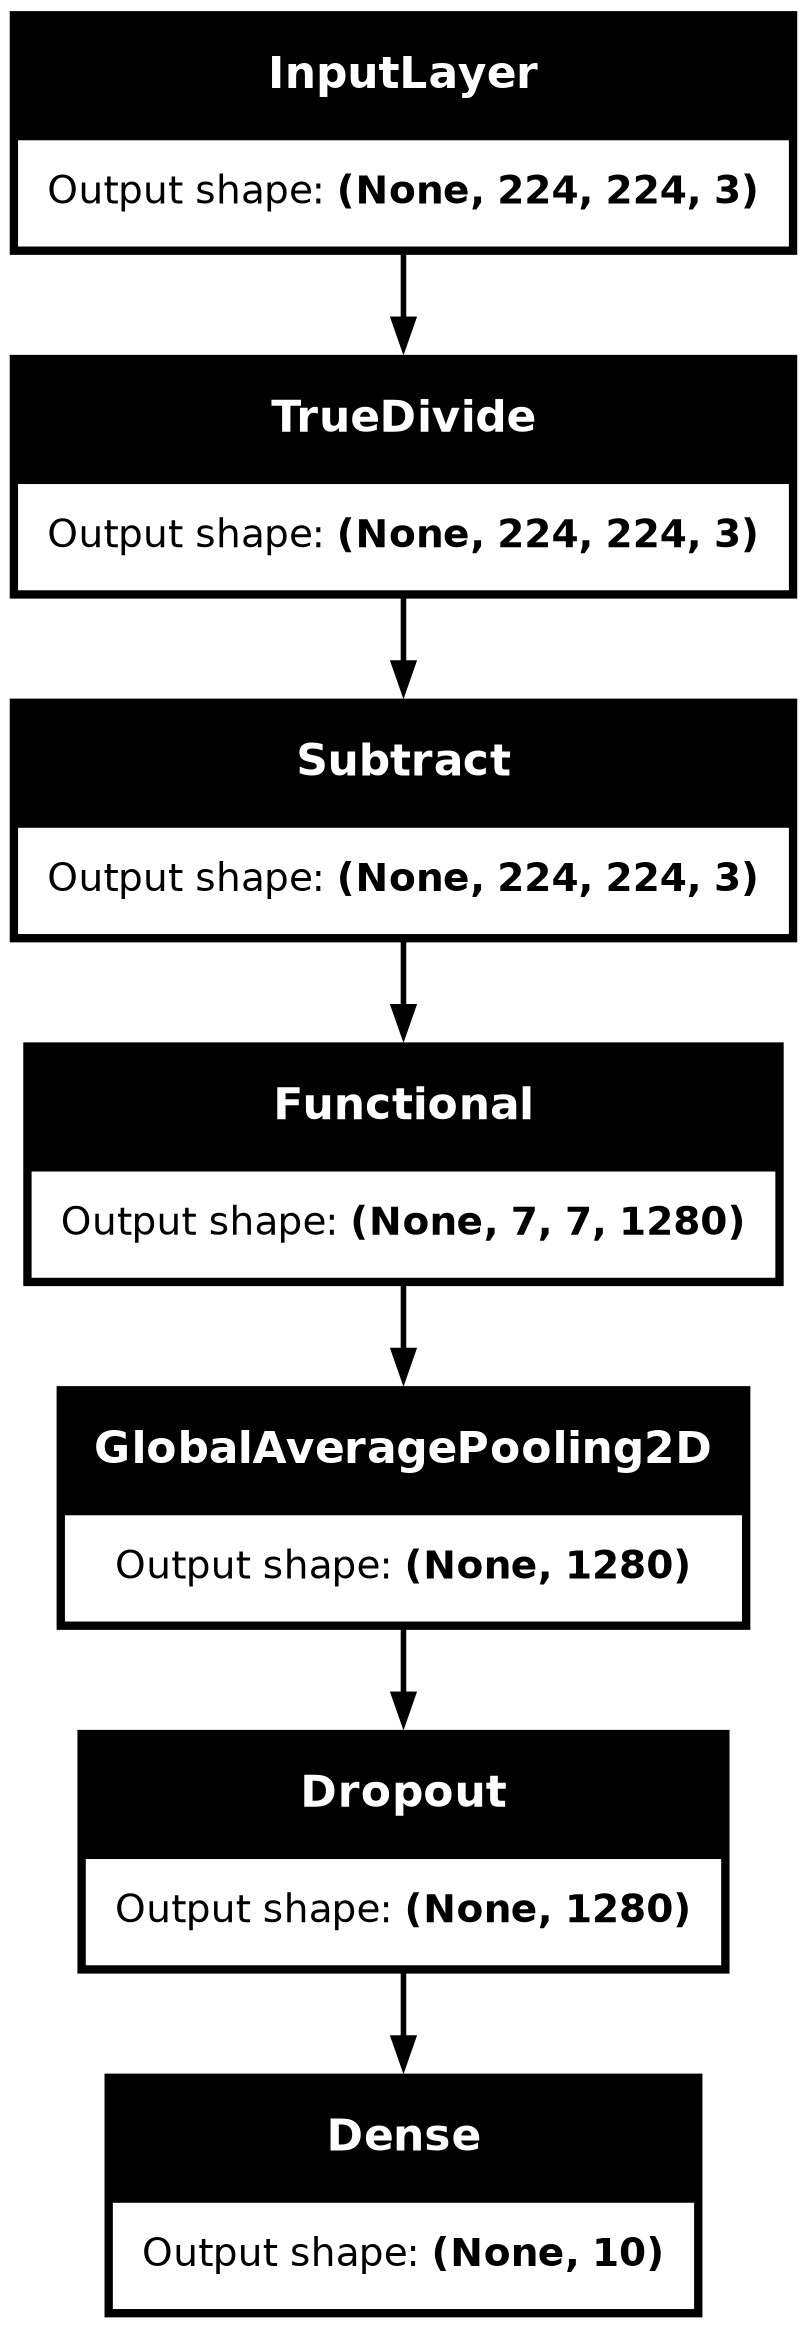

In [113]:
#tf.keras.utils.plot_model(model, show_shapes=True)

In [114]:
#Compile the model before training it 
#We use accuracy as metric 
base_learning_rate = 0.09
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [115]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [116]:
#training the model on specific number of epochs
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 3.0705


W0000 00:00:1711203814.678274      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [117]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.07
initial accuracy: 0.12


In [118]:
history = model.fit(train,epochs=initial_epochs,validation_data=val, batch_size = 16, verbose =1)

Epoch 1/10
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2500 - loss: 4.4040

W0000 00:00:1711203822.443975      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 788ms/step - accuracy: 0.3644 - loss: 4.2987 - val_accuracy: 0.8750 - val_loss: 0.5522
Epoch 2/10


W0000 00:00:1711203825.546184      99 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8009 - loss: 2.6366 - val_accuracy: 0.9375 - val_loss: 0.3709
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8956 - loss: 1.1914 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9305 - loss: 0.5705 - val_accuracy: 0.8750 - val_loss: 1.5715
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9282 - loss: 0.6225 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9734 - loss: 0.2354 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9473 - loss: 0.8362 - val_accuracy: 0.8750 - val_loss: 1.9504
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9207 - loss: 0.2995 - val_accuracy: 0.9375 - val_loss: 1.0331
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9882 - loss: 0.1845 - val_accuracy: 0.9375 - val_loss: 0.0522
Epo

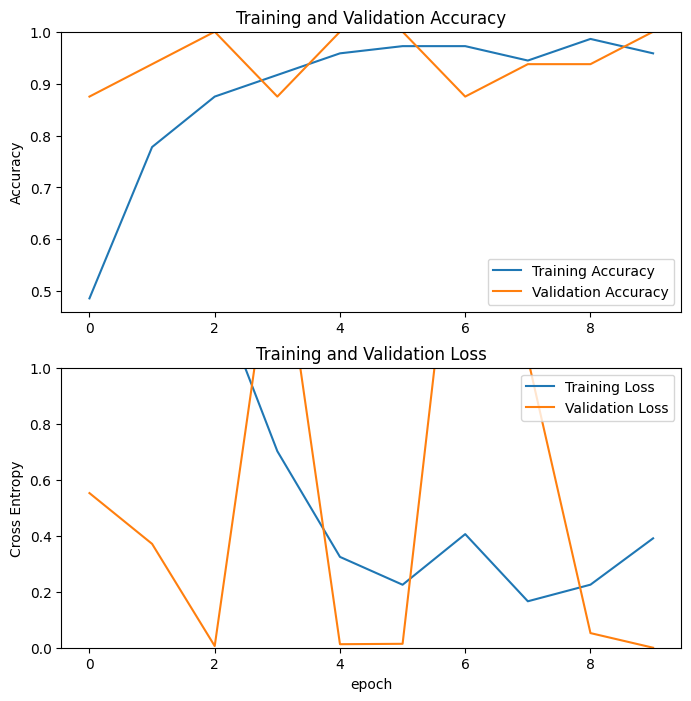

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

In [120]:
base_model.trainable = True

In [121]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))


#Here we are setting the lower layers i.e. lesser than fine_tune_at to be not trainable as we do not want the model to forget the info it has already learned.
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [122]:
#After freezing the models lower layers we can compile it again to make the changes take effect
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [123]:
len(model.trainable_variables)

56

In [124]:
#If we trained the model to convergence earlier this can be used to increase the accuracy a little bit
# fine_tune_epochs = 10
# total_epochs =  initial_epochs + fine_tune_epochs

# history_fine = model.fit(train,epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=val,batch_size = 16,verbose =1)

In [125]:
# acc = history.history['accuracy'] +history_fine.history['accuracy']
# val_acc = history.history['val_accuracy'] +  history_fine.history['val_accuracy']

# loss = history.history['loss'] + history_fine.history['loss']
# val_loss = history.history['val_loss'] +  history_fine.history['val_loss']

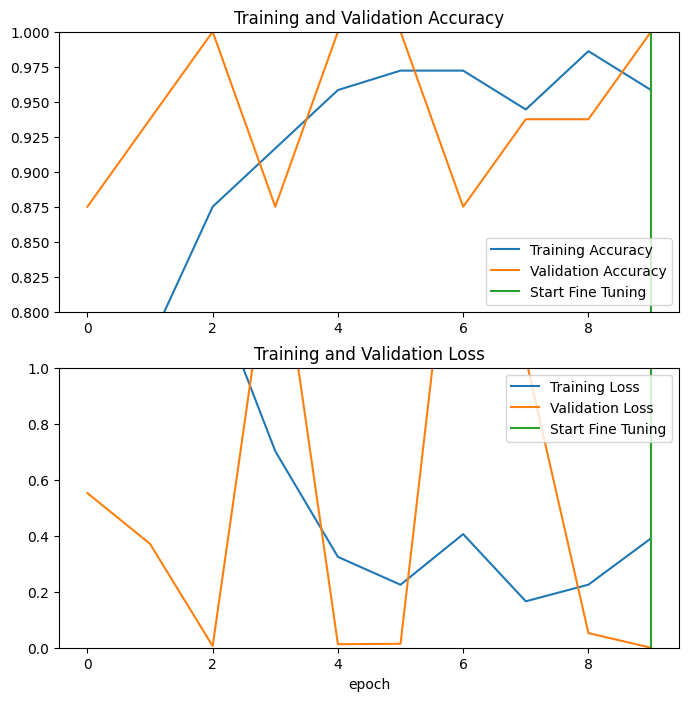

In [126]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [127]:
# from tensorflow.keras.preprocessing import image
# image_path = '/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0314.JPG'

# # Load the image
# img = image.load_img(image_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Create a batch

# # Preprocess the image according to the model
# img_array = preprocess_input(img_array)

# # Predict on the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)

# # Display the image and predicted class
# plt.imshow(img)
# plt.title("Predicted Label: " + class_names[np.argmax(batch_prediction[0])])
# plt.show()

In [128]:
# from tensorflow.keras.preprocessing import image
# image_path = '/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0112.jpg'

# # Load the image
# img = image.load_img(image_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Create a batch

# # Preprocess the image
# img_array = preprocess_input(img_array)

# # Predict on the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)

# # Display the image and predicted class
# plt.imshow(img)
# plt.title("Predicted Label: " + class_names[np.argmax(batch_prediction[0])])
# plt.show()

In [129]:
# from tensorflow.keras.preprocessing import image
# image_path = '/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg'

# # Load the image
# img = image.load_img(image_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Create a batch

# # Preprocess the image
# img_array = preprocess_input(img_array)

# # Predict on the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)

# # Display the image and predicted class
# plt.imshow(img)
# plt.title("Predicted Label: " + class_names[np.argmax(batch_prediction[0])])
# plt.show()

In [130]:
# from tensorflow.keras.preprocessing import image
# image_path = '/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0293.JPG'

# # Load the image
# img = image.load_img(image_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Create a batch

# # Preprocess the image
# img_array = preprocess_input(img_array)

# # Predict on the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions)

# # Display the image and predicted class
# plt.imshow(img)
# plt.title("Predicted Label: " + class_names[np.argmax(batch_prediction[0])])
# plt.show()

In [131]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def evaluate_model(test_dataset_path, model):
    # Define parameters for ImageDataGenerator
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Load images from the test dataset directory
    test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=(224, 224),  # Specify the target size of the images
        batch_size=16,  # Set batch size to 16 for faster evaluation
        class_mode=None,  # Since we are not using class labels, set class_mode to None
        shuffle=False  # Set to False if you want to keep the order of images
    )

    # Generate predictions for the entire test dataset
    predictions = model.predict(test_generator)

    # Apply a sigmoid since your model returns logits
    predictions = tf.nn.sigmoid(predictions)
    predicted_labels = tf.where(predictions < 0.5, 0, 1).numpy().flatten()

    # Get true labels from the generator
    true_labels = test_generator.classes

    # Calculate accuracy
    accuracy = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred) / len(true_labels)
    return accuracy

# Call the function to evaluate the model
test_accuracy = evaluate_model("/kaggle/working/test", model)
print('Test accuracy:', test_accuracy)

Found 70 images belonging to 3 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

W0000 00:00:1711203836.314491     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  
Test accuracy: 0.3142857142857143


W0000 00:00:1711203841.997762     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [132]:
# import os
# model_version=max([int(i) for i in os.listdir("/kaggle/input/rice-leaf-diseases") + [0]])+1
# model.save(f"/kaggle/input/rice-leaf-diseases{model_version}")